<Body>   
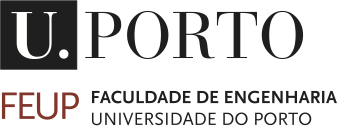   
<h1> <b>Perception and Mapping 2022/2023 </b> </h1>
<p><b>João Henrique Torres Santos, Thaidy Deguchi </b> (up201806590@edu.fe.up.pt, up201802575@edu.fe.up.pt )</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---


## Imports

Import all the librarys needed


In [4]:
pip install celluloid


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-plain-generic is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [6]:
import matplotlib.pyplot as plt ##Imports needed
import numpy as np
from numpy import dot 
from numpy import * 
from numpy.linalg import inv 
from numpy.linalg import det
import random
import pandas as pd
import scipy as sc
from celluloid import Camera
from IPython.display import HTML
random.seed(3)

##Data Retrieve
data = pd.read_csv("data.txt", sep="  ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,6.000000,6.000000,1.570796,0.013854,0.259160,0.151822,5.126005,5.133477,5.127614,5.268437,...,5.485348,5.598972,5.463337,5.382658,5.346047,5.183563,5.298282,5.286704,5.142983,5.123603
1,5.969615,6.347296,1.745329,-0.042241,0.328125,0.264165,4.606962,4.617594,4.476726,4.518856,...,4.393931,4.560061,4.372866,4.406254,4.252319,4.389442,4.645192,4.467599,4.689150,4.501786
2,5.879385,6.684040,1.919862,-0.102122,0.288509,0.221659,3.928100,3.947598,3.868139,3.861918,...,4.283550,4.308768,4.349257,4.270373,4.442246,4.593801,4.568892,4.694624,4.822147,4.714335
3,5.732051,7.000000,2.094395,-0.171024,0.282909,0.146961,3.222485,3.258487,3.342531,3.283906,...,4.216387,4.441626,4.689877,4.739798,4.610815,4.630851,4.907835,4.993803,5.155649,5.049896
4,5.532089,7.285575,2.268928,-0.209341,0.364688,0.046941,2.993846,2.947056,2.923171,2.995412,...,4.853843,4.884169,4.930389,4.945946,5.235724,5.392808,5.422814,5.670105,5.957440,5.973307


## **Exercise A**




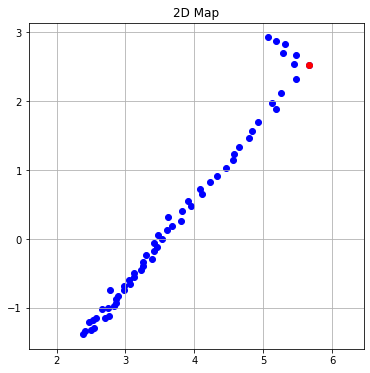

In [7]:
##inicialization
x_o, y_o = [], []
Position = data.iloc[:, np.arange(0,3,1)].values
Variations = data.iloc[:, np.arange(3,6,1)].values
Lidar_range = data.iloc[:, np.arange(6,67,1)].values
angle = np.linspace(-30, 30, num=61)

#Corner detection
def corners(t,x_o,y_o):

  save_dist = []

  max = 0
  for i in range(len(x_o)):
    dist = np.sqrt(x_o[i]**2 + y_o[i]**2)
    save_dist.append(dist)
    if dist > max:
      max = dist
      save_i = i

  if ((save_i < 6) or (save_i > 55)):

    a_1 = np.arctan((y_o[7]-y_o[0])/(x_o[7]-x_o[0]))
    a_2 = np.arctan((y_o[60]-y_o[53])/(x_o[60]-x_o[53]))
    diff = np.arctan(np.tan(a_1 - a_2))*180/np.pi

    if (diff > 70) or (diff < -70):

      save_dist_1 = save_dist[0:30]
      save_dist_2 = save_dist[31:61]

      if save_i < 6:
        max = 0
        for i in range(len(save_dist_2)):
          if save_dist_2[i] > max:
            max = save_dist_2[i]
            save_i = i

      else:
        max = 0
        for i in range(len(save_dist_1)):
          if save_dist_1[i] > max:
            max = save_dist_1[i]
            save_i = i

    else:
      return -1

  return save_i


#Change the t parameter to see each moment of the detection
t = 5

for i in range(len(Lidar_range[t])):
  x_o.append(Lidar_range[t][i]*np.cos((angle[i]/180)*np.pi))
  y_o.append(Lidar_range[t][i]*np.sin((angle[i]/180)*np.pi))


pos = corners(t,x_o,y_o)

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')

plt.grid()
plt.scatter(x_o, y_o, color='b')

if pos != -1:
  plt.scatter(x_o[pos], y_o[pos], color='r')

plt.title('2D Map');
plt.show()

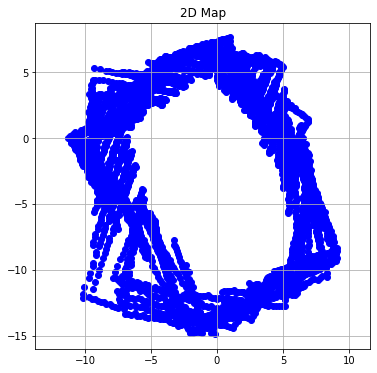

In [8]:
x_o, y_o = [], []

dx = 0
dy = 0
dangle = 0


for t in range(len(Lidar_range)):
  dx = dx + Variations[t][0]
  dy = dy + Variations[t][1]
  dangle = dangle + Variations[t][2]
  T = np.array([[dx], [dy]])
  R = np.array([[np.cos(dangle), -np.sin(dangle)], [np.sin(dangle), np.cos(dangle)]])
  for i in range(len(Lidar_range[t])):
    point = np.array([[Lidar_range[t][i]*np.cos((angle[i]/180)*np.pi)], [Lidar_range[t][i]*np.sin((angle[i]/180)*np.pi)]])
    p = T + np.dot(R,point)
    x_o.append(p[0])
    y_o.append(p[1])



fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')

plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

## **Exercise A - Full map with corners**




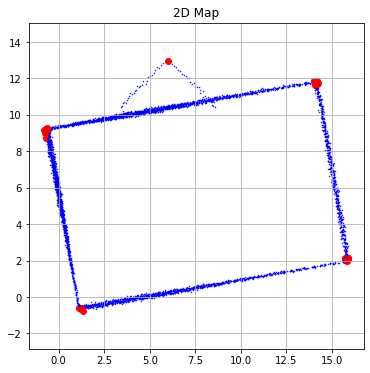

In [9]:
map_x, map_y, x_o, y_o, save_point_x, save_point_y = [], [], [], [], [], []

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')

plt.grid()

for t in range(len(Lidar_range)):

  x_o.clear()
  y_o.clear()
  save_point_x.clear()
  save_point_y.clear()
  T = np.array([[Position[t][0]], [Position[t][1]]])
  R = np.array([[np.cos(Position[t][2]), -np.sin(Position[t][2])], [np.sin(Position[t][2]), np.cos(Position[t][2])]])
  for i in range(len(Lidar_range[t])):
    point = np.array([[Lidar_range[t][i]*np.cos((angle[i]/180)*np.pi)], [Lidar_range[t][i]*np.sin((angle[i]/180)*np.pi)]])
    save_point_x.append(point[0])
    save_point_y.append(point[1])
    p = T + np.dot(R,point)
    x_o.append(p[0])
    y_o.append(p[1])
    map_x.append(p[0])
    map_y.append(p[1])


  plt.scatter(x_o, y_o, color='b',marker='.',s=1)

  pos = corners(t,save_point_x,save_point_y)

  if pos != -1: 
    plt.scatter(x_o[pos], y_o[pos], color='r')   
      


plt.title('2D Map');
plt.show()

## **Exercise 2**




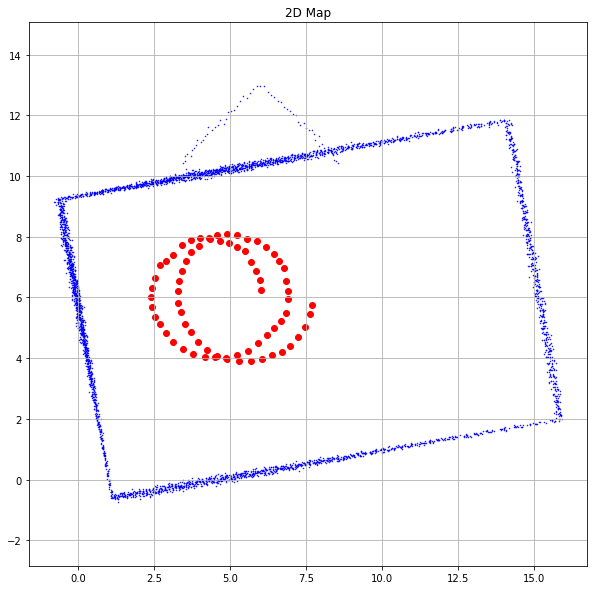

In [10]:
x = Position[0][0]
y = Position[0][1]
angle = Position[0][2]

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')

plt.grid()
camera = Camera(fig)

for i in range(len(Variations)):
  x = x + Variations[i][0]
  y = y + Variations[i][1]
  angle = angle + Variations[i][2]


  plt.scatter(x, y, color='r')
  camera.snap()

plt.scatter(map_x, map_y, color='b',marker='.',s=1)
plt.title('2D Map');
plt.show()  

## **Temporal Evolution Video**




In [11]:
animation = camera.animate(interval = 150, blit=False, repeat=True)

HTML(animation.to_html5_video())

## **Exercise 3**




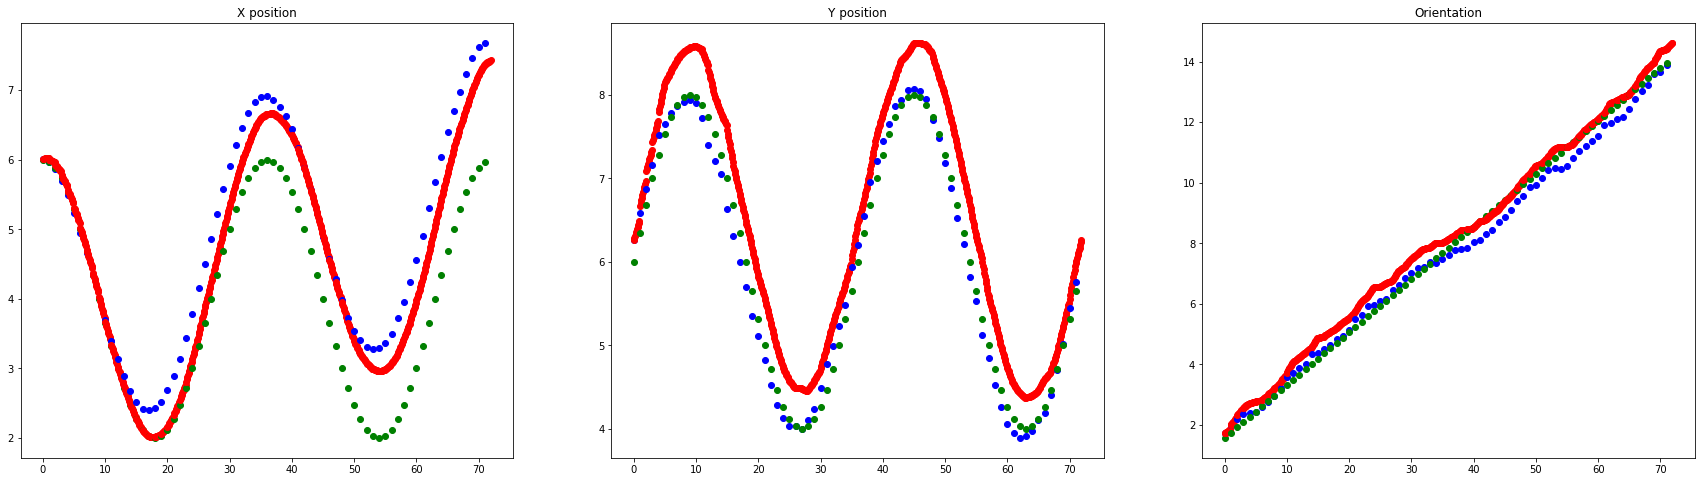

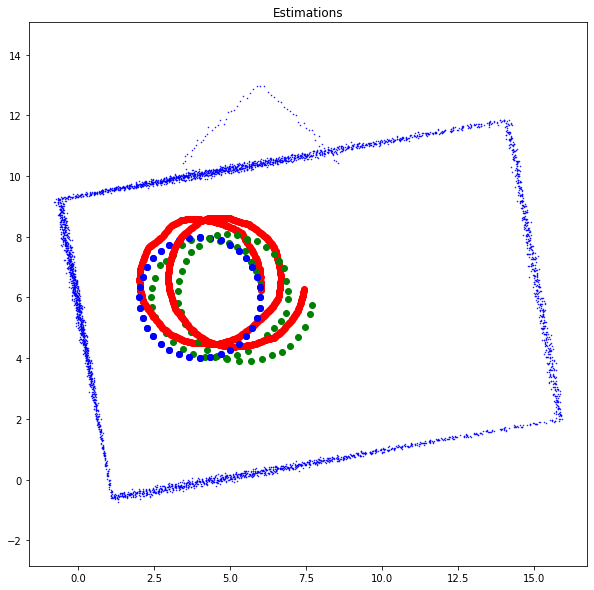

In [12]:
Position = data.iloc[:, np.arange(0,3,1)].values
Variations = data.iloc[:, np.arange(3,6,1)].values
Lidar_range = data.iloc[:, np.arange(6,67,1)].values
angle = np.linspace(-30, 30, num=61)

x = Position[0][0]
y = Position[0][1]
ang = Position[0][2]
fig, axes = plt.subplots(1,3, figsize = (30,8))
axes[0].title.set_text("X position")
axes[1].title.set_text("Y position")
axes[2].title.set_text("Orientation")



fig2, ax2 = plt.subplots(figsize=(10,10))
plt.title("Estimations")
ax2.axis('equal')


camera = Camera(fig)
camera2 = Camera(fig2)


def kf_predict(X, P, A, Q, B, U, F): 
    """      
      X : The mean state estimate of the previous step (k−1) - shape(m,1) 
      P : The state covariance of previous step (k−1) - shape(m,m) 
      A : The transition  matrix - shape(m,m) 
      Q : The process noise covariance matrix - shape(m,m) 
      B : The input effect matrix - shape(p, m) 
      U : The control input - shape(q,1)
    """ 
    X = A @ X + B @ U 
    P = A @ P @ A.T + F @ Q @ F.T
    return(X,P) 

def kf_update(X, P, Y, H, R): 
    """      
      K  : the Kalman Gain matrix 
      IS : the Covariance or predictive mean of Y  
    """
    IS = H @ P @ H.T + R  
    K = P @ H.T @ inv(IS) 
    X = X + K @ (Y- H @ X) 
 #   P = P - K @ IS @ K.T 
    P = P - K @ H @ P 
    return (X,P) 


#
#
# Initial Values
#
#
o_a = 0.04
o_o = 0.2


#Inter sample time
dt = 0.1

# ini state
X = np.array( [ [Position[0][0]], 
                [Position[0][1]], 
                [Position[0][2]]] ) 

# ini Covar 
P = np.array( [ [ 999.0, 0.0, 0.0 ],
                [ 0.0, 999.0, 0.0 ],
                [ 0.0, 0.0, 999.0 ] ] ) 

# state matrix
A = np.array( [ [ 1.0, 0.0, 0.0],
                [ 0.0, 1.0, 0.0],
                [ 0.0, 0.0, 1.0] ] )         

# input effect matrix
B = np.array( [ [dt, 0, 0], 
                [0, dt, 0],
                [0, 0, dt] ] )   

F = np.array( [ [0, 0, 0],
                [0, 0, 0], 
                [0, 0, 0] ] )



# meas matrix
H = np.array( [ [ 1.0, 0.0, 0.0],
                [ 0, 1, 0],
                [ 0, 0, 1]] )          


# meas noise
R = np.array([ [o_o**2, 0, 0],
               [0, o_o**2, 0],
               [0, 0, o_o**2]] ) 

# process noise
Q = np.array([[ o_a**2, 0, 0 ],
              [ 0, o_a**2, 0 ],
              [ 0, 0, o_a**2 ]]) 


# For Plotting
t=0
time = []      
x_pos = []      
y_pos = []      
theta_pos = []
x_pos_sd = []  
y_pos_sd = []   
theta_pos_sd = []
x_pos_up = []  
x_pos_dn = []  
y_pos_up = []  
y_pos_dn = []  
theta_pos_up = []  
theta_pos_dn = []  

x_o, y_o, save_point_x, save_point_y = [], [], [], []
pos = []
#
#
# "Simulation" + Kalman Filter loop
#
#

N_iter = 72   # implies dt*N_iter seconds
i = 0

while i < N_iter:
  i = round(i,1)

  if (i%1 == 0):

    x = x + Variations[int(i)][0]
    y = y + Variations[int(i)][1]
    ang = ang + Variations[int(i)][2]
    axes[0].scatter(i, x, color="blue")
    axes[0].scatter(i, Position[int(i)][0], color="green")
    axes[1].scatter(i, y, color="blue")
    axes[1].scatter(i, Position[int(i)][1], color="green")
    axes[2].scatter(i, ang, color="blue")
    axes[2].scatter(i, Position[int(i)][2], color="green")
    ax2.scatter(x, y, color='green')
    ax2.scatter(Position[int(i)][0], Position[int(i)][1], color='blue')

    save_point_x.clear()
    save_point_y.clear()
    x_o.clear()
    y_o.clear()
    Trans = X[:1]
    Rot = np.array([[np.cos(X[2][0]), -np.sin(X[2][0])], [np.sin(X[2][0]), np.cos(X[2][0])]])
    camera.snap()
    for k in range(len(Lidar_range[int(i)])):
      point = np.array([[Lidar_range[int(i)][k]*np.cos((angle[k]/180)*np.pi)], [Lidar_range[int(i)][k]*np.sin((angle[k]/180)*np.pi)]])
      save_point_x.append(point[0])
      save_point_y.append(point[1])
      p = Trans + np.dot(Rot,point)
      x_o.append(p[0])
      y_o.append(p[1])

    pos = corners(i,save_point_x,save_point_y)
    camera2.snap()
    #print(X[len(X)-2:])

    # if (pos != -1):
    #   if (len(X) == 3):
    #     zeros = np.zeros((5,1))
    #     zeros[:3,:1] = X
    #     X = zeros.copy()

    #     id = np.identity(5)
    #     id[:3,:3] = B
    #     B = id.copy()

    #     id = np.identity(5)
    #     id[:3,:3] = A
    #     A = id.copy()

    #     U_new = np.array([ [Variations[i][0]], [Variations[i][1]], [Variations[i][2]],  ]


    # meas
    Y = np.array([ [Variations[int(i)][0]],
                  [Variations[int(i)][1]],
                  [Variations[int(i)][2]] ]) + X

    
    # put the input in the right variable
    U = np.array([ [Variations[int(i)][0]],
                  [Variations[int(i)][1]],
                  [Variations[int(i)][2]] ])
    

  (X, P) = kf_predict(X, P, A, Q, B, U, F)

  if (i%1 == 0):
    (X, P) = kf_update(X, P, Y, H, R) 
  
  #print(X)
  time.append(t)
  x_pos.append( X[0].item() )
  y_pos.append( X[1].item() )
  theta_pos.append( X[2].item() )
  x_pos_sd.append( sqrt( P[0][0]).item() )
  y_pos_sd.append( sqrt( P[1][1]).item() )
  theta_pos_sd.append( sqrt( P[2][2]).item() )
  x_pos_up.append( X[0].item() + sqrt( P[0][0]).item() )
  x_pos_dn.append( X[0].item() - sqrt( P[0][0]).item() )
  y_pos_up.append( X[1].item() + sqrt( P[1][1]).item() )
  y_pos_dn.append( X[1].item() - sqrt( P[1][1]).item() )
  theta_pos_up.append( X[2].item() + sqrt( P[2][2]).item() )
  theta_pos_dn.append( X[2].item() - sqrt( P[2][2]).item() )
  
  axes[0].scatter(i, X[0], color="red")
  axes[1].scatter(i, X[1], color="red")
  axes[2].scatter(i, X[2], color="red")
  ax2.scatter(X[0], X[1], color='red')

  i += dt;
  
# End For Loop


ax2.scatter(map_x, map_y, color='b',marker='.',s=1)



# # d
# chart1 = fig.add_subplot(211)
# chart1.plot(t_time, train_d_time, label='train_d', c="b", linewidth=3, alpha=0.2)
# chart1.plot(t_time,d_time, label='d', c="b")
# chart1.fill_between(t_time, d_dn_time, d_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
# plt.legend(loc='upper left')
# chart1.set_ylabel('d[m]')
# plt.grid()


# # v
# chart2 = fig.add_subplot(212)
# chart2.plot(t_time, train_v_time, label='train_v', c="g", linewidth=3, alpha=0.2)
# chart2.plot(t_time,v_time, label='v', c="g")
# chart2.fill_between(t_time,v_dn_time,v_up_time, alpha=0.2, label='$v\pm\sigma$')
# chart2.set_ylabel('v [m/s]')
# chart2.set_xlabel('t [s]')
# plt.legend(loc='upper left')
# plt.grid()
# plt.show()

## **Temporal Evolution Video**




In [13]:
animation = camera.animate(interval = 150, blit=False, repeat=True)

HTML(animation.to_html5_video())

In [14]:
animation = camera2.animate(interval = 150, blit=False, repeat=True)

HTML(animation.to_html5_video())

In [15]:
!jupyter nbconvert --to html /content/PM_Trabalho1.ipynb

[NbConvertApp] WARNING | pattern '/content/PM_Trabalho1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e